# House prices - Advanced Regression Techniques

In [1]:
import pandas as pd

/tmp/ipykernel_22120/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_and_test_dfs = [train_df, test_df]
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Baseline model, removing all null values columns

In [10]:
baseline_train_df = train_df.copy()

In [11]:
baseline_train_df.dropna(axis=1, inplace=True)

In [12]:
baseline_train_df = pd.get_dummies(baseline_train_df)

In [13]:
# train a linear regression model on train_df
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = baseline_train_df.drop(columns=['SalePrice'])
y = baseline_train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred) / 1e6

16343815667.427073

## (Optional) select columns

In [7]:
selected_columns = [
    'OverallQual',
    'GrLivArea',
    'GarageArea',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt',
    'YearRemodAdd',
    'Foundation',
    'Fireplaces',    
]
train_df = train_df[selected_columns + ['SalePrice']]
test_df = test_df[selected_columns + ['Id']]

## Handle null values

<Axes: >

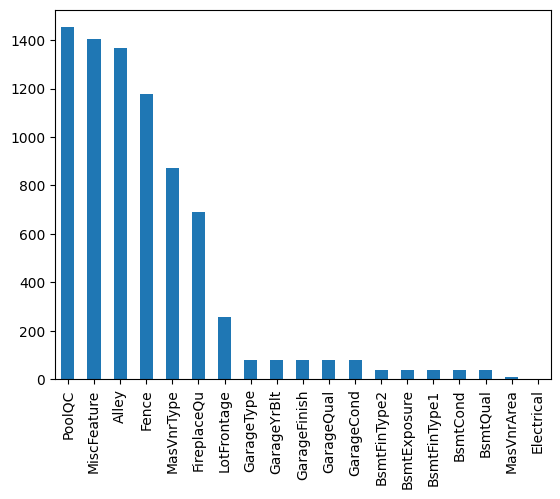

In [14]:
# get the columns that has missing values
train_df[train_df.columns[train_df.isnull().any()]].isnull().sum().sort_values(ascending=False).plot(kind='bar')

<Axes: >

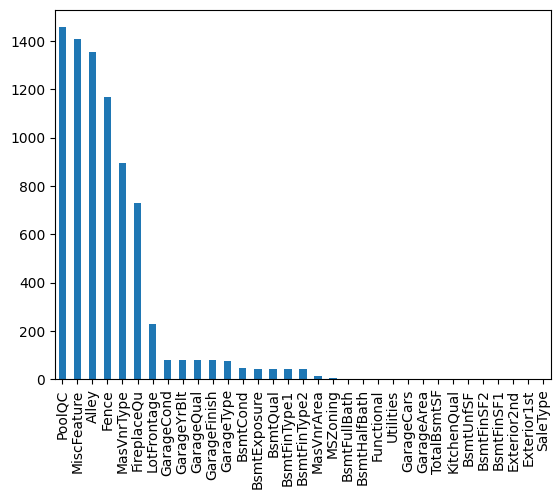

In [15]:
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [17]:
test_df.GarageArea = test_df.GarageArea.fillna(test_df.GarageArea.mean())

In [18]:
for df in train_and_test_dfs:
    string_cols = df.select_dtypes(include='object').columns
    df[string_cols] = df[string_cols].fillna('None')

    zero_cols = [
        'LotFrontage',
        'MasVnrArea',
        'GarageCars',
        'GarageArea',
        'BsmtHalfBath',
        'TotalBsmtSF',
        'BsmtFullBath',
        'BsmtFinSF1',
        'BsmtFinSF2',
        'BsmtUnfSF'
    ]
    df[zero_cols] = df[zero_cols].fillna(0)

    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])



In [19]:
test_df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 80, dtype: bool

In [21]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [22]:
train_df.corr()['SalePrice'].abs().sort_values(ascending=False).head(25)


SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
GarageYrBlt         0.508043
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.472614
FireplaceQu_None    0.471908
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtQual_TA         0.452394
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
HeatingQC_Ex        0.434543
Name: SalePrice, dtype: float64

In [23]:
# train a linear regression model on train_df
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random forest regressor model
model = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)



/home/mahhe/code/misc/kaggle/house-prices-advanced-regression-techniques/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mahhe/code/misc/kaggle/house-prices-advanced-regression-techniques/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mahhe/code/misc/kaggle/house-prices-advanced-regression-techniques/venv/lib/python3.11/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_

Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
y_pred = grid_search.best_estimator_.predict(test_df.drop(columns=['Id']))
predictions = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
predictions.to_csv('data/submission.csv', index=False)

In [ ]:
numeric_columns = train_df.select_dtypes(include='number').columns
numeric_columns


Index(['OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'SalePrice'],
      dtype='object')

In [ ]:
import numpy as np

train_df['GrLivArea'] = np.log1p(train_df['GrLivArea'])
train_df['GarageArea'] = np.log1p(train_df['GarageArea'])
train_df['TotRmsAbvGrd'] = np.log1p(train_df['TotRmsAbvGrd'])
test_df['GrLivArea'] = np.log1p(test_df['GrLivArea'])
test_df['GarageArea'] = np.log1p(test_df['GarageArea'])
test_df['TotRmsAbvGrd'] = np.log1p(test_df['TotRmsAbvGrd'])

/tmp/ipykernel_30203/521009150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GrLivArea'] = np.log1p(test_df['GrLivArea'])
/tmp/ipykernel_30203/521009150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GarageArea'] = np.log1p(test_df['GarageArea'])
/tmp/ipykernel_30203/521009150.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
# train a linear regression model on train_df
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred) / 1e6

1939.5985480322986

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create the linear regression model
model = LinearRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Hyperparameters:
{'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 1939598548.0322986
